# WeatherPy


#Weather Data Analysis:

1)As we approach the equator the temperature increases.
2)Since data has been collected in summer the temperatures are warmer in northen hemisphire.
3)There is no relationship between city latitude and wind speed, cloudiness and Humidity.

In [147]:
!pip install citipy

In [148]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json 



# Import API key
from api_keys import api_key
# units = "metric"
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [149]:
url = "http://api.openweathermap.org/data/2.5/weather?appid=a8d136621182c927f171780131019b2c"
city = "Los Angeles"
Base_url= url + "&q=" + city.replace(" ", "+")
response = requests.get(Base_url).json()

print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 34.05,
        "lon": -118.24
    },
    "dt": 1581479762,
    "id": 5368361,
    "main": {
        "feels_like": 282.32,
        "humidity": 42,
        "pressure": 1017,
        "temp": 286.12,
        "temp_max": 291.15,
        "temp_min": 278.15
    },
    "name": "Los Angeles",
    "sys": {
        "country": "US",
        "id": 3694,
        "sunrise": 1581432129,
        "sunset": 1581471144,
        "type": 1
    },
    "timezone": -28800,
    "visibility": 16093,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 275,
        "speed": 2.67
    }
}


In [150]:
# Base_url= "http://api.openweathermap.org/data/2.5/find?q=London&units=metric&APPID=a8d136621182c927f171780131019b2c"
# response = requests.get(Base_url).json()

# print(json.dumps(response, indent=4, sort_keys=True))

In [151]:
response.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [152]:
x = response["clouds"]["all"]
print(x)

1


## Generate Cities List

In [153]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [154]:
#Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# url= "http://api.openweathermap.org/data/2.5/find?q={city}&units=metric&APPID=a8d136621182c927f171780131019b2c"
# Start the call counter 
count_one = 0
set_one = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    
    try: 
        Base_url= url + "&q=" + city.replace(" ", "+")
        response = requests.get(f"{Base_url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])

        if count_one > 48:
            count_one = 1
            set_one += 1
            city_name.append(city)
        else:
            count_one += 1
            city_name.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")
        









Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | mantua
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | dekar
Processing Record 4 of Set 1 | surt
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | haines junction
City not found. Skipping...
Processing Record 7 of Set 1 | privolnyy
Processing Record 8 of Set 1 | maldonado
Processing Record 9 of Set 1 | lalin
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | mecca
Processing Record 12 of Set 1 | tokonou
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | dikson
Processing Record 15 of Set 1 | rondonopolis
Processing Record 16 of Set 1 | pevek
City not found. Skipping...
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | san rafael
Processing Record 19 of Set 1 | sisimiut
Processing Record 20 of Set 1 | hermanus
City not found. Skipping...
Processing Record 21 of Set 1 | georgetown
Processing Re

Processing Record 39 of Set 4 | mnogovershinnyy
Processing Record 40 of Set 4 | road town
City not found. Skipping...
Processing Record 41 of Set 4 | kozhva
Processing Record 42 of Set 4 | nivala
Processing Record 43 of Set 4 | puerto ayora
Processing Record 44 of Set 4 | fredericton
Processing Record 45 of Set 4 | porciuncula
Processing Record 46 of Set 4 | smithers
Processing Record 47 of Set 4 | olafsvik
Processing Record 48 of Set 4 | nemuro
Processing Record 49 of Set 4 | tobe
Processing Record 1 of Set 5 | pisco
City not found. Skipping...
Processing Record 2 of Set 5 | mar del plata
Processing Record 3 of Set 5 | seminole
Processing Record 4 of Set 5 | arrecife
Processing Record 5 of Set 5 | hobart
Processing Record 6 of Set 5 | cruzeiro do sul
City not found. Skipping...
Processing Record 7 of Set 5 | galesong
Processing Record 8 of Set 5 | fortuna
Processing Record 9 of Set 5 | waipawa
Processing Record 10 of Set 5 | inndyr
Processing Record 11 of Set 5 | saint-philippe
Proces

Processing Record 28 of Set 8 | gargzdai
Processing Record 29 of Set 8 | tigil
Processing Record 30 of Set 8 | cidreira
Processing Record 31 of Set 8 | mount isa
Processing Record 32 of Set 8 | santa rosa
Processing Record 33 of Set 8 | riyadh
Processing Record 34 of Set 8 | talnakh
Processing Record 35 of Set 8 | develi
Processing Record 36 of Set 8 | ayan
Processing Record 37 of Set 8 | ode
Processing Record 38 of Set 8 | newport
Processing Record 39 of Set 8 | tondano
Processing Record 40 of Set 8 | pankrushikha
Processing Record 41 of Set 8 | fare
Processing Record 42 of Set 8 | sola
City not found. Skipping...
Processing Record 43 of Set 8 | dryden
Processing Record 44 of Set 8 | labis
Processing Record 45 of Set 8 | vila franca do campo
Processing Record 46 of Set 8 | naantali
Processing Record 47 of Set 8 | manta
Processing Record 48 of Set 8 | pozo colorado
Processing Record 49 of Set 8 | san jose
Processing Record 1 of Set 9 | san quintin
Processing Record 2 of Set 9 | camargo

Processing Record 23 of Set 12 | ewo
Processing Record 24 of Set 12 | mildura
Processing Record 25 of Set 12 | blairmore
Processing Record 26 of Set 12 | qaqortoq
Processing Record 27 of Set 12 | chara
Processing Record 28 of Set 12 | middelburg
Processing Record 29 of Set 12 | port keats
------------------------------
Data Retrieval Complete
------------------------------


In [156]:
# Export the city data into a .csv.
weather_data.to_csv('Output_CSV/weather_data.csv')

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [164]:
# Create a dictonary with the lists generated
weatherpy_dict = ({
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country": country,
    "Date": date, 
    "Humidity": humidity,
    "Lat": lat, 
    "Lng": lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
})

# weather_data = pd.DataFrame(weatherpy_dict)
# # weather_data.head()
weather_data = pd.DataFrame.from_dict(weatherpy_dict, orient='index')

weather_data.transpose()

 # Create a data frame from dictionary
data = pd.DataFrame(weather_data).transpose()
data
new_header = data.iloc[0]
data = data[1:] 
# data.columns = new_header
data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,mantua,100,PF,1581479774,80,-23.12,-134.97,299.24,9.19
2,Rikitea,27,BW,1581479774,86,-21.53,21.93,292.89,4.08
3,rikitea,0,LY,1581479774,44,31.21,16.59,286.72,3.93
4,Dekar,1,PF,1581479774,78,-9.8,-139.03,300.75,7.06
5,dekar,31,CA,1581479267,90,60.75,-137.51,253.73,1.5
...,...,...,...,...,...,...,...,...,...
1131,chara,None,None,None,None,None,None,None,None
1132,Middelburg,None,None,None,None,None,None,None,None
1133,middelburg,None,None,None,None,None,None,None,None
1134,Port Keats,None,None,None,None,None,None,None,None


In [165]:
data.count()

City          1135
Cloudiness     567
Country        567
Date           567
Humidity       567
Lat            567
Lng            567
Max Temp       567
Wind Speed     567
dtype: int64

In [166]:
# Export the city data into a .csv.
data.to_csv('Output_CSV/weather_data.csv',index=False )
weather_data = pd.read_csv('Output_CSV/weather_data.csv',index_col=0)


In [167]:
# Display data frame head 
weather_data.head()


,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City,,,,,,,,
mantua,100.0,PF,1.581480e+09,80.0,-23.12,-134.97,299.24,9.19
Rikitea,27.0,BW,1.581480e+09,86.0,-21.53,21.93,292.89,4.08
rikitea,0.0,LY,1.581480e+09,44.0,31.21,16.59,286.72,3.93
Dekar,1.0,PF,1.581480e+09,78.0,-9.80,-139.03,300.75,7.06
dekar,31.0,CA,1.581479e+09,90.0,60.75,-137.51,253.73,1.50


In [168]:
weather_data.count()


Cloudiness    567
Country       563
Date          567
Humidity      567
Lat           567
Lng           567
Max Temp      567
Wind Speed    567
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

C:\Users\sanaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


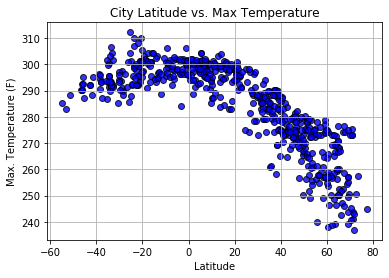

In [177]:
# Build a scatter plot for each data type
fig, ax = plt.subplots()

# x_axis = weather_data["Lat"]
ax.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", linewidths=1, facecolors="blue",edgecolor="black",alpha=0.8, label="Cities")

# Incorporate the other graph properties
ax.set_title("City Latitude vs. Max Temperature")
ax.set_ylabel("Max. Temperature (F)")
ax.set_xlabel("Latitude")
ax.grid(True)

fig.savefig("Output_Plots/Max_Temp_vs_Latitude.png")
# Show plot
fig.show()

#### Latitude vs. Humidity Plot

C:\Users\sanaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


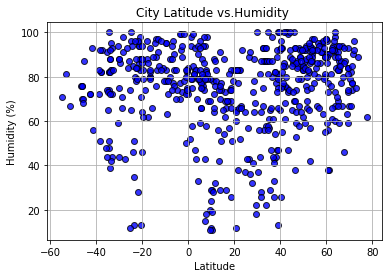

In [176]:
# Build a scatter plot for each data type
fig, ax = plt.subplots()

x_axis = weather_data["Lat"]
ax.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", linewidths=1, facecolors="blue",edgecolor="black",alpha=0.8, label="Cities")

# Incorporate the other graph properties
ax.set_title("City Latitude vs.Humidity ")
ax.set_ylabel("Humidity (%)")
ax.set_xlabel("Latitude")
ax.grid(True)

fig.savefig("Output_Plots/Humidity_vs_Latitude.png")
# Show plot
fig.show()


#### Latitude vs. Cloudiness Plot

C:\Users\sanaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


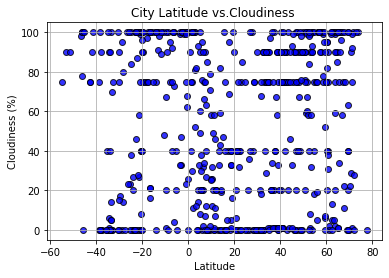

In [174]:
# Build a scatter plot for each data type

fig, ax = plt.subplots()

x_axis = weather_data["Lat"]
ax.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", linewidths=1, facecolors="blue",edgecolor="black",alpha=0.8, label="Cities")
            
# Incorporate the other graph properties
ax.set_title("City Latitude vs.Cloudiness ")
ax.set_ylabel("Cloudiness (%)")
ax.set_xlabel("Latitude")
ax.grid(True)

fig.savefig("Output_Plots/Cloudiness_vs_Latitude.png")
# Show plot
fig.show()



#### Latitude vs. Wind Speed Plot

C:\Users\sanaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


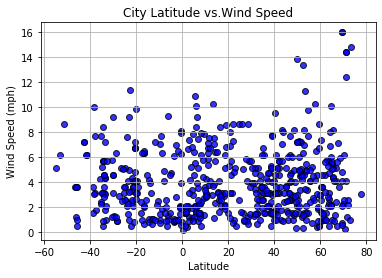

In [175]:
fig, ax = plt.subplots()

x_axis = weather_data["Lat"]
ax.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", linewidths=1, facecolors="blue",edgecolor="black",alpha=0.8, label="Cities")

# Incorporate the other graph properties
ax.set_title("City Latitude vs.Wind Speed")
ax.set_ylabel("Wind Speed (mph)")
ax.set_xlabel("Latitude")
ax.grid(True)

fig.savefig("Output_Plots/Wind_Speed_vs_Latitude.png")
# Show plot
fig.show()




